# Polynomial Curve Fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def polynomial_data_generation(n_samples):
    np.random.seed(10)

    x = 10 * np.random.normal(0, 0.5, n_samples)
    y = x - 3 * (x ** 2) + 0.5 * (x ** 3) + 3*np.random.normal(3, 10, n_samples)
    print('generating '+ str(n_samples)+ ' data points from a certain polynomial function')
    return x, y

def vis_data_points(x, y):
    plt.scatter(x,y, s=20)
    plt.show()
    


def poly_fitting(x, y, p_Order):
    coefficients = np.polyfit(x,y,p_Order)
    poly_func = np.poly1d(coefficients) 
    return poly_func


generating 100 data points from a certain polynomial function
using 20 samples for curve fitting


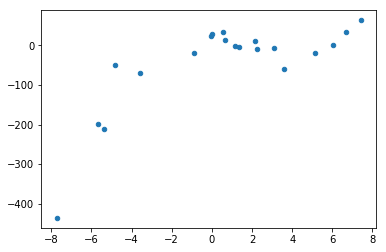

we will use 80 samples for testing


In [2]:
n_samples = 100
x, y = polynomial_data_generation(n_samples)
# use 20% data points for curve fitting
n_train = int(np.round(n_samples* 0.2))
print('using {:.0f} samples for curve fitting'.format(n_train))
x0 = x[:n_train]
y0 = y[:n_train]
x1 = x[n_train:]# use the rest for testing
y1 = y[n_train:]
vis_data_points(x0, y0)
print('we will use {:.0f} samples for testing'.format(n_samples - n_train) )

## Assuming it is a Polynomial function with order M: 
y = $f(x, \mathbf{w}) = \sum_{i=0}^Mw_ix^j = w_0+w_1x+w_2x^2+...+w_Mx^M$
## what is the best M?
### Let's try M= {0, 1, 3, 9}

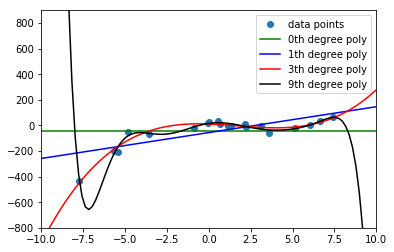

In [12]:
fig = plt.figure()
xx = np.linspace(-10, 10, 100)
plt.axis([-10,10,-800,900])
plt.plot(x0,y0,'o',xx,poly_fitting(x0, y0, 0)(xx),'-g',
                   xx,poly_fitting(x0, y0, 1)(xx),'-b',
                   xx,poly_fitting(x0, y0, 3)(xx),'-r',
                   xx,poly_fitting(x0, y0, 9)(xx),'-k',
        )
plt.legend(['data points', '0th degree poly', 
                           '1th degree poly',
                           '3th degree poly', 
                           '9th degree poly'
           ])
plt.show()

## Which M is better? 
    

In [4]:
from sklearn.metrics import mean_squared_error

p_orders = [0, 1, 3, 9]
for M in p_orders:
    print('-------------------')
    print('p_order:', M)
    poly_func_M = poly_fitting(x0, y0, M)
    print(poly_func_M)
    _RMSE = np.sqrt(mean_squared_error(y0, poly_func_M(x0)))  
    print('                           RMSE: {:0.2f}'.format(_RMSE))


-------------------
p_order: 0
 
-43.6
                           RMSE: 113.13
-------------------
p_order: 1
 
20.21 x - 55.6
                           RMSE: 75.28
-------------------
p_order: 3
       3         2
0.643 x - 3.302 x - 4.549 x + 11.56
                           RMSE: 24.71
-------------------
p_order: 9
            9             8            7           6           5
-4.416e-05 x + 0.0004168 x + 0.003504 x - 0.04408 x - 0.02606 x
          4         3         2
 + 1.357 x - 1.315 x - 16.04 x + 18.67 x + 16.2
                           RMSE: 18.77


### Is a larger M better? test on some test data (x1, y1)


In [5]:
p_orders = [0, 1, 3, 9]
for M in p_orders:
    print('-------------------')
    print('p_order:', M)
    poly_func_M = poly_fitting(x0, y0, M)
    print(poly_func_M)
    _RMSE = np.sqrt(mean_squared_error(y0, poly_func_M(x0)))  
    test_RMSE = np.sqrt(mean_squared_error(y1, poly_func_M(x1)))  
    print('                           RMSE: {:0.2f}'.format(_RMSE))
    print('                      test_RMSE: {:0.2f}'.format(test_RMSE))


-------------------
p_order: 0
 
-43.6
                           RMSE: 113.13
                      test_RMSE: 235.71
-------------------
p_order: 1
 
20.21 x - 55.6
                           RMSE: 75.28
                      test_RMSE: 164.96
-------------------
p_order: 3
       3         2
0.643 x - 3.302 x - 4.549 x + 11.56
                           RMSE: 24.71
                      test_RMSE: 51.49
-------------------
p_order: 9
            9             8            7           6           5
-4.416e-05 x + 0.0004168 x + 0.003504 x - 0.04408 x - 0.02606 x
          4         3         2
 + 1.357 x - 1.315 x - 16.04 x + 18.67 x + 16.2
                           RMSE: 18.77
                      test_RMSE: 10722.24


visualise the test data


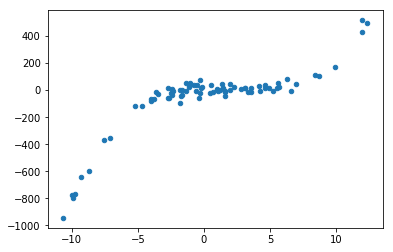

In [6]:
print('visualise the test data')
vis_data_points(x1, y1)


### Reducing the effect of overfitting by using bigger data? 
Setting n_sample = 10000, and use 20% of the data for training (2000). test M = {3, 9}